# Loading the Housing dataset into a data frame

In [1]:
import pandas as pd

url="https://raw.githubusercontent.com/scikit-learn/scikit-learn/refs/heads/main/sklearn/datasets/data/boston_house_prices.csv"

df=pd.read_csv(url,skiprows=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Exploratory data analysis (EDA)

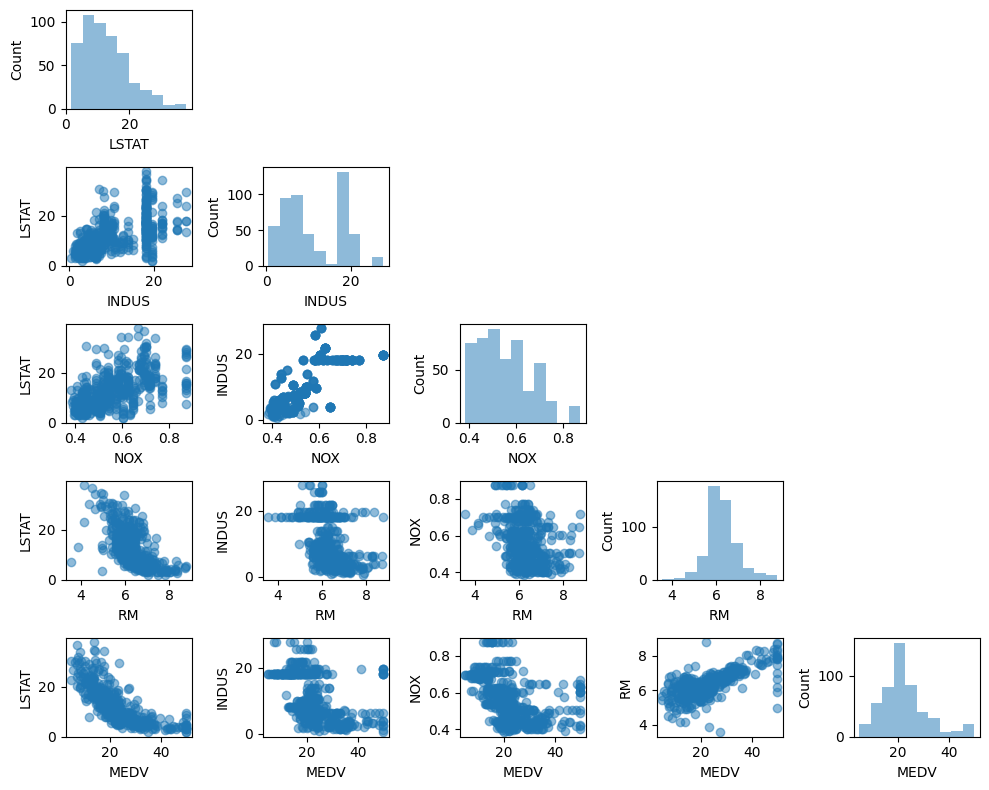

In [2]:
import matplotlib.pyplot as plt

from mlxtend.plotting import scatterplotmatrix
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

scatterplotmatrix(df[cols].values, figsize=(10, 8), names=cols, alpha=0.5)

plt.tight_layout()
plt.show()

we can see that there
is a linear relationship between RM and house prices, MEDV (the fifth column of the
fourth row). Furthermore, we can see in the histogram—the lower-right subplot in
the scatterplot matrix—that the MEDV variable seems to be normally distributed but
contains several outliers

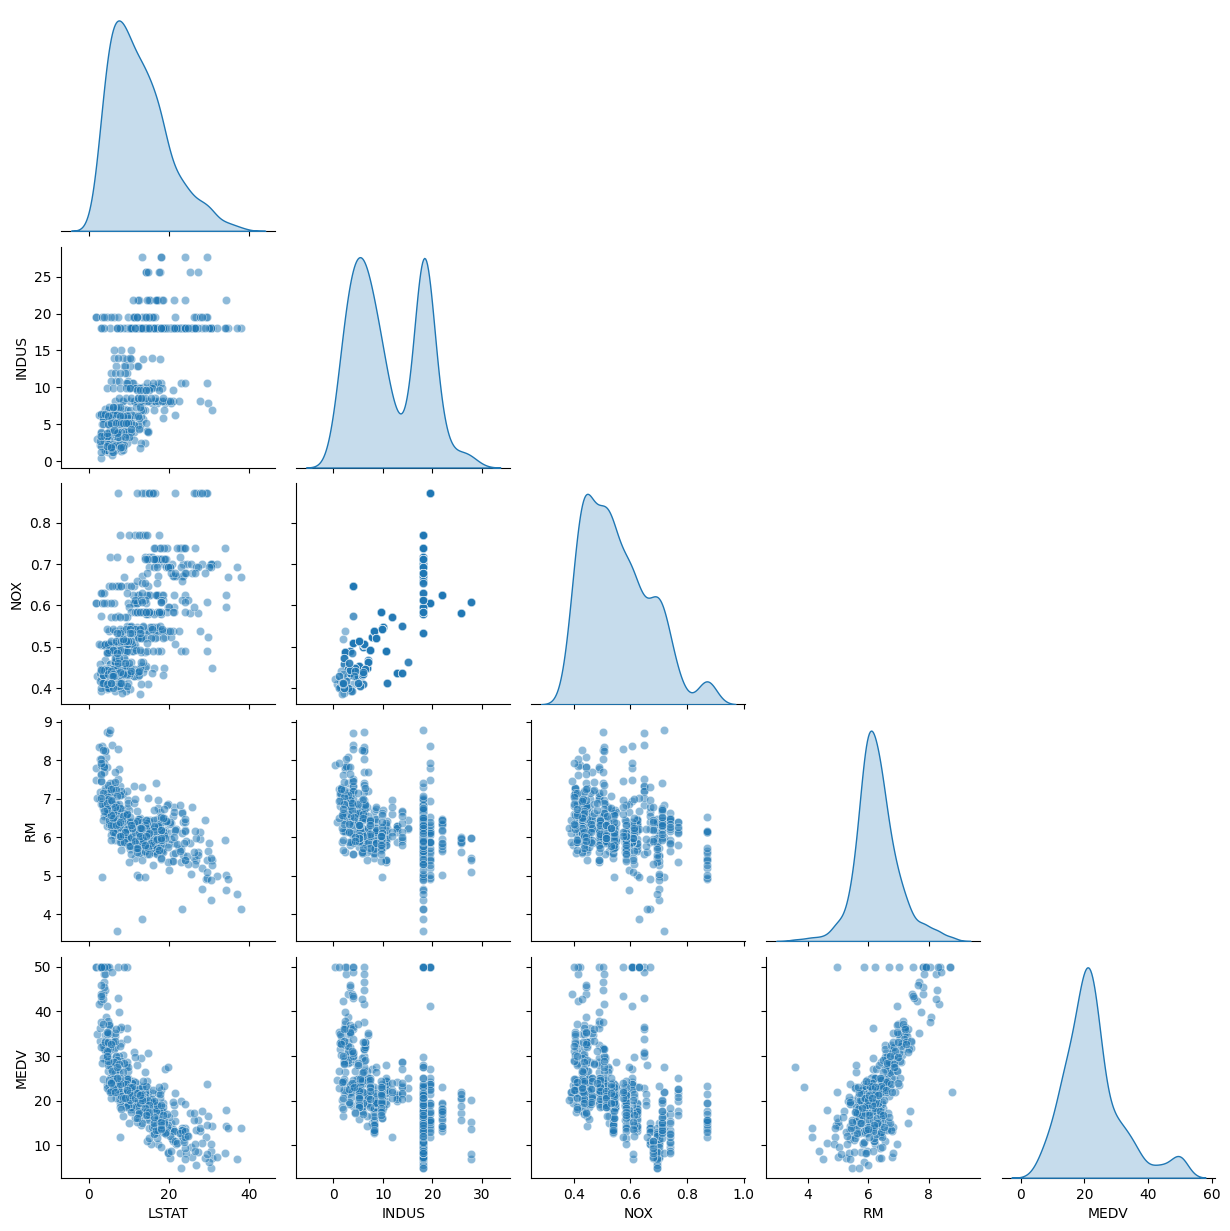

In [3]:
import seaborn as sns


# Assuming df is your DataFrame
sns.pairplot(df[cols], diag_kind='kde', plot_kws={'alpha':0.5}, corner=True)
plt.show()


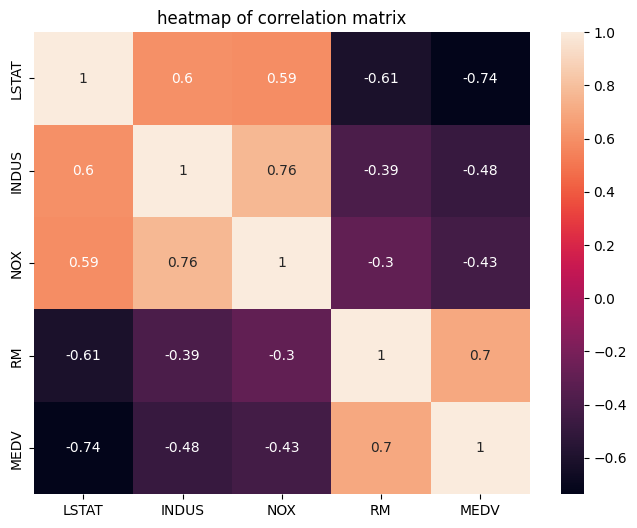

In [4]:
correlation_matrix=df[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title("heatmap of correlation matrix")
plt.show()

# Implementing an ordinary least squares linear regression model

## Adaline

In [5]:
import numpy as np
class AdalineGD():


  def __init__(self,eta=0.01, n_iter=50, random_state=1):
    self.eta=eta #learning rate
    self.n_iter=n_iter #passes over the training dataset
    self.random_state=random_state #seed for random weights initialization

  def fit(self, X,y):
    '''
    we have a continues cost function which is j
    we want to minimize j
    we updates wights and bias using gradient
    so: w=w+delta w
    delata w= eta* something which is hard to write it here!
    '''
    rgen=np.random.RandomState(self.random_state)
    self.w_=rgen.normal(size=X.shape[1]+1)#X.shape[1] is number of features and X.shape[0] is number of data rows
    self.cost=[]

    for i in range(self.n_iter):
      net_input=self.net_input(X)
      output=self.activation(net_input)
      error=output-y
      self.w_[1:]=self.w[1:]+X.T.dot(error)* self.eta
      self.w_[0]+=eta*np.sum(error)
      cost=(error**2).sum()/2
      self.cost_.append(cost)


  def net_input(self, X):
    '''
    we product weights to features
    '''
    return np.dot(X,self.w_[1:])+self.w_[0] #self.w_[0] is a bias term


  def Activation(self, X):
    return X

  def predict(self, X):
    return np.where(np.activation(np.net_input(X)>=0.0,1 , -1))

In [27]:
class LinearRegressionGD:

  def __init__(self, eta=0.001, n_iter=20):
    self.eta=eta
    self.n_iter=n_iter

  def fit(self, X, y):
    self.w_=np.zeros(X.shape[1]+1)
    self.cost_=[]

    for i in range(self.n_iter):
      output=self.net_input(X)
      error=y-output
      self.w_[1:]=+ self.eta*X.T.dot(error)
      self.w_[0]=+ self.eta* error.sum()
      cost=(error**2).sum() /2.0
      self.cost_.append(cost)

    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:])+self.w_[0]

  def predict(self, X):
    return self.net_input(X)

In [14]:
df['MEDV'].values.shape

(506,)

In [16]:
df['RM'].values.shape

(506,)

In [28]:
X = df[['RM']].values
y = df['MEDV'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

In [26]:
lr.cost_

[252.99999999999994]

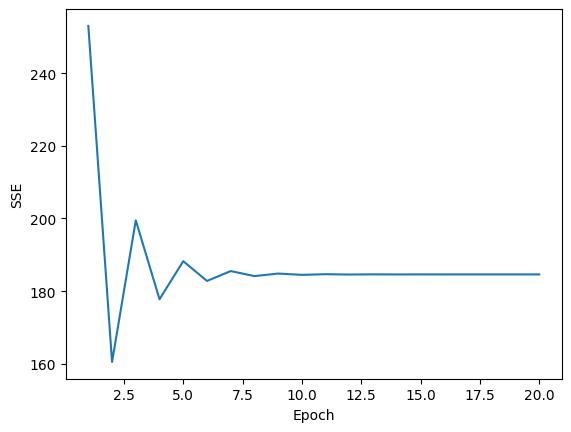

In [29]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [36]:
def lin_regplot(X, y, model):
  plt.plot(X, model.predict(X), color='black', lw=2)
  plt.scatter(X, y, edgecolor='white')
  return None

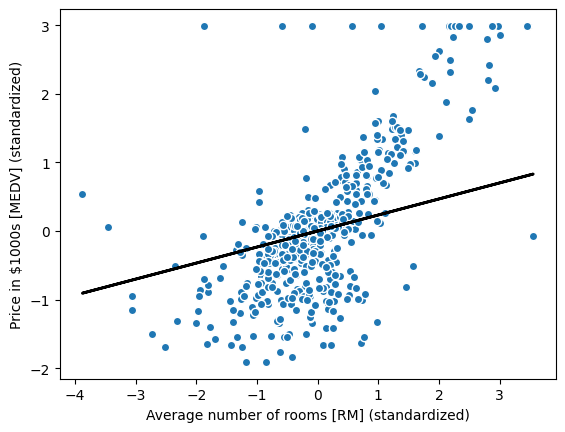

In [37]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

**train linear regression using 2 dimentional X**

In [38]:
df[['RM','LSTAT']].values.shape

(506, 2)

In [46]:
X = df[['RM','LSTAT']].values
y = df['MEDV'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD(n_iter=40)
lr.fit(X_std, y_std)

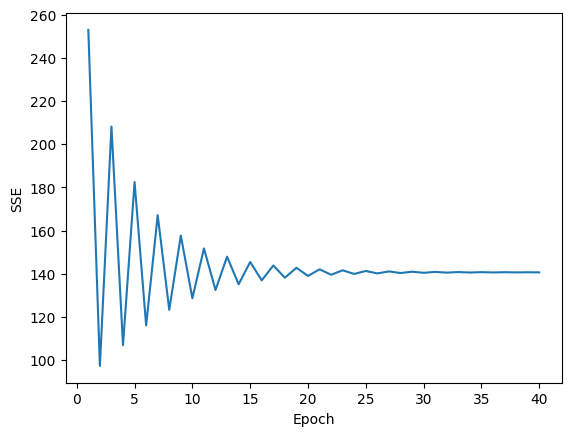

In [47]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [48]:
len(lr.cost_)

40

In [52]:
len(df['RM'].values)

506

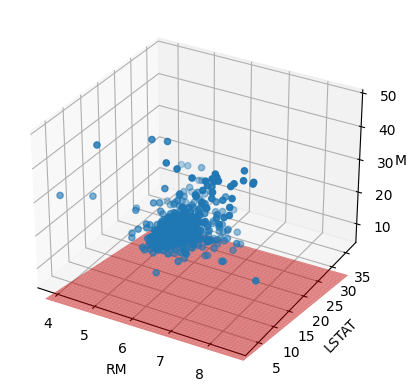

In [67]:
import matplotlib.pyplot as plt
import numpy as np





fig = plt.figure()
ax = fig.add_subplot(projection='3d')


ax.scatter(df['RM'].values , df['LSTAT'].values, df['MEDV'].values, label='Original data')


# Create a meshgrid for the surface plot
rm_range = np.linspace(df['RM'].min(), df['RM'].max(), 100)
lstat_range = np.linspace(df['LSTAT'].min(), df['LSTAT'].max(), 100)
rm_grid, lstat_grid = np.meshgrid(rm_range, lstat_range)
X_grid = np.column_stack((rm_grid.ravel(), lstat_grid.ravel()))
y_grid_pred = lr.predict(X_grid).reshape(rm_grid.shape)

# Surface plot of the predicted values
ax.plot_surface(rm_grid, lstat_grid, y_grid_pred, color='red', alpha=0.5, label='Predicted surface')

ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')
# Set axis limits
ax.set_xlim(df['RM'].values.min(), df['RM'].values.max())  # Set limits for x-axis
ax.set_ylim(df['LSTAT'].values.min(), df['LSTAT'].values.max())  # Set limits for y-axis
ax.set_zlim(df['MEDV'].values.min(), df['MEDV'].values.max())  # Set limits for z-axis

plt.show()

In [68]:
lr.w_

array([-1.98951966e-16,  1.90566824e-01, -2.08472941e-01])